# Table of Contents
- Introduction
- Preliminary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

# Communicate Data Insights: Ford GoBike System Data (part 1/2)
## by Brian Kogi

## Introduction
This is the final project in the Udacity Data Analysis Nanodegree course. The project is divided into 2 main parts, using data visualization to understand and derive insights from data.

In this document, I will explore the 2017-fordgobike-tripdata datafile, a dataset containing information about individual trips made in a bike-sharing system covering the greater San Francisco Bay area, using Python libraries.

In the second part of the project (2/2), I will share a short presentation that illustrates some interesting properties, trends, and relationships discovered in the selected (cleaned) dataset. I will also have an output of the cleaned data.

#### 1.1. Dataset and its origin

The Dataset consists of information regarding 183411 bike trips for the month of February, including its timing and geolocation of the start and end of each trip. The dataset 2017-fordgobike-tripdata.csv can be found in the download here. Each trip is anonymized and includes:

    Trip
    Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    bike_share_for_all_trip (tracks members who are enrolled in the Bike Share for All program for low-income residents).
    User Type



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar
%matplotlib inline

In [2]:
# reading the dataset
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# getting the general information concerning the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# checking out the number of unique values
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
# checking the data in the tail end of the data
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
# gettting the sum of the null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# making a copy of the dataframe to be used for cleanning purposes
clean_df=df.copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# dropping the columns without null values and saving the null values in a different dataframe
na_counts = clean_df.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude','bike_id','user_type','bike_share_for_all_trip'], axis=1).isna().sum()
print(na_counts)

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64


### Question
#### What is the distribution of null values between columns with null values? 

### Visualization

C:\Users\kogi\anaconda3\envs\udacity_data_wrangling\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


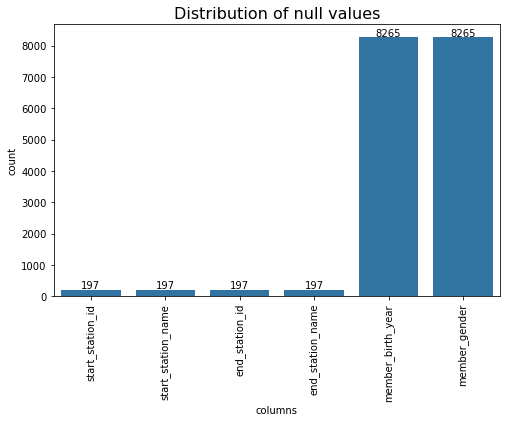

In [9]:
# plotting a bar chart containing null values
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
# get the current tick locations and labels
plt.xticks(rotation=90)
plt.xlabel('columns', color='black')
plt.ylabel('count')
plt.title("Distribution of null values", fontsize=16, color='black')
# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

### Observation
The columns related to columns have an equal amount of null values and the columns related to people have an equal amount of null values, this means that there must have been a consistent error while writing the two as the null values are constant in each category.

#### Define
Drop null values

#### Code

In [10]:
# dropping null values from the clean_df dataframe
clean_df=clean_df.dropna()

#### Test

In [11]:
# confirming the data has been dropped
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [12]:
clean_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Define
start time and end time are not in datetime format

#### Code

In [13]:
# converting start_time and end_time to datetime
cols = clean_df.columns[1:3]
clean_df[cols] = clean_df[cols].apply(pd.to_datetime, errors='coerce')

#### Test

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [15]:
clean_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Define
The dataset only contains birth years but there is no column which tells us the ages of the people.

#### Code

In [16]:
clean_df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

#### Test

In [17]:
clean_df.age.value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
91.0         1
141.0        1
89.0         1
109.0        1
92.0         1
Name: age, Length: 75, dtype: int64

#### Define
#### Converting time to minutes
- Seconds is a bit difficult to read, hence I will add another column for time in minutes

#### Code

In [18]:
clean_df['duration_min'] = clean_df['duration_sec']/60

#### Test

In [19]:
clean_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865,11.733379
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,27.370082
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000,1.016667
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000,5.383333
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000,8.500000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000,13.150000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,1409.133333


#### Define
- Here, we are trying to see how many months are in the dataset.
- We are going to extract the months and add them to a column in case the month is needed during analysis

#### Code

In [20]:
clean_df['num_start_month'] = clean_df['start_time'].apply(lambda time: time.month)
clean_df['char_start_month'] = clean_df['num_start_month'].apply(lambda x: calendar.month_abbr[x])
clean_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,num_start_month,char_start_month
52960,665,2019-02-21 16:33:44.839,2019-02-21 16:44:49.980,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5408,Subscriber,1987.0,Male,No,32.0,11.083333,2,Feb
60318,378,2019-02-20 18:48:40.321,2019-02-20 18:54:58.765,343.0,Bryant St at 2nd St,37.783172,-122.393572,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2857,Subscriber,1994.0,Male,No,25.0,6.300000,2,Feb
45912,363,2019-02-22 10:55:37.818,2019-02-22 11:01:41.284,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,80.0,Townsend St at 5th St,37.775235,-122.397437,4838,Subscriber,1988.0,Male,No,31.0,6.050000,2,Feb
182913,585,2019-02-01 07:32:02.126,2019-02-01 07:41:47.199,85.0,Church St at Duboce Ave,37.770083,-122.429156,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5540,Subscriber,1990.0,Female,No,29.0,9.750000,2,Feb
14078,463,2019-02-27 13:34:53.733,2019-02-27 13:42:37.383,77.0,11th St at Natoma St,37.773507,-122.416040,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2870,Subscriber,1983.0,Other,No,36.0,7.716667,2,Feb


#### Test

In [21]:
clean_df.char_start_month.unique()
# we can verify that this dataset contains data for bikes borrowed in the month of february

array(['Feb'], dtype=object)

#### Define
- We would like to separate the hours into different periods morning, afternoon, night.
- We will add a column of data containing the three periods, which can later be used to categorize the data.

#### Code

In [22]:
# separating the time into: morning, afternoon, night of a day
clean_df['start_hour'] = clean_df['start_time'].apply(lambda time: time.hour)
clean_df['period_day'] = 'morning'
clean_df['period_day'][(clean_df['start_hour'] >= 12) & (clean_df['start_hour'] <= 17)] = 'afternoon'
clean_df['period_day'][(clean_df['start_hour'] >= 18) & (clean_df['start_hour'] <= 23)] = 'night'

C:\Users\kogi\AppData\Local\Temp\ipykernel_10756\4217391257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['period_day'][(clean_df['start_hour'] >= 12) & (clean_df['start_hour'] <= 17)] = 'afternoon'
C:\Users\kogi\AppData\Local\Temp\ipykernel_10756\4217391257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['period_day'][(clean_df['start_hour'] >= 18) & (clean_df['start_hour'] <= 23)] = 'night'


#### Test

In [23]:
clean_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,num_start_month,char_start_month,start_hour,period_day
181281,562,2019-02-01 09:17:09.447,2019-02-01 09:26:31.837,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,338.0,13th St at Franklin St,37.803189,...,Subscriber,1990.0,Female,No,29.0,9.366667,2,Feb,9,morning
66788,698,2019-02-20 08:25:43.923,2019-02-20 08:37:21.951,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,24.0,Spear St at Folsom St,37.789677,...,Subscriber,1984.0,Male,No,35.0,11.633333,2,Feb,8,morning
118801,168,2019-02-11 18:34:51.595,2019-02-11 18:37:39.846,49.0,S Park St at 3rd St,37.780760,-122.394989,47.0,4th St at Harrison St,37.780955,...,Subscriber,1986.0,Male,No,33.0,2.800000,2,Feb,18,night
14733,431,2019-02-27 11:18:42.520,2019-02-27 11:25:53.649,61.0,Howard St at 8th St,37.776513,-122.411306,223.0,16th St Mission BART Station 2,37.764765,...,Subscriber,1975.0,Male,No,44.0,7.183333,2,Feb,11,morning
28252,186,2019-02-25 08:55:45.844,2019-02-25 08:58:52.213,16.0,Steuart St at Market St,37.794130,-122.394430,23.0,The Embarcadero at Steuart St,37.791464,...,Subscriber,1988.0,Female,No,31.0,3.100000,2,Feb,8,morning


#### Define
- The data now contains dates, it would be better if we extracted the day of the week from the dates
- This will help us analyze the data on a daily basis and get the general trend.

#### Code

In [24]:
# adding Day of the week
clean_df['start_weekday_num'] = clean_df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
clean_df['start_weekday_char'] = clean_df['start_weekday_num'].map(dmap)

#### Test

In [25]:
clean_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,duration_min,num_start_month,char_start_month,start_hour,period_day,start_weekday_num,start_weekday_char
85368,706,2019-02-17 15:20:38.000,2019-02-17 15:32:24.876,58.0,Market St at 10th St,37.776619,-122.417385,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,Male,No,26.0,11.766667,2,Feb,15,afternoon,6,Sun
15796,419,2019-02-27 09:06:01.024,2019-02-27 09:13:00.707,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,81.0,Berry St at 4th St,37.775880,...,Male,No,40.0,6.983333,2,Feb,9,morning,2,Wed
124591,284,2019-02-11 08:28:58.652,2019-02-11 08:33:43.069,24.0,Spear St at Folsom St,37.789677,-122.390428,11.0,Davis St at Jackson St,37.797280,...,Male,No,26.0,4.733333,2,Feb,8,morning,0,Mon
173118,1050,2019-02-03 13:09:40.800,2019-02-03 13:27:10.968,58.0,Market St at 10th St,37.776619,-122.417385,118.0,Eureka Valley Recreation Center,37.759177,...,Female,No,20.0,17.500000,2,Feb,13,afternoon,6,Sun
34137,692,2019-02-24 08:47:33.009,2019-02-24 08:59:05.408,77.0,11th St at Natoma St,37.773507,-122.416040,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,...,Male,No,31.0,11.533333,2,Feb,8,morning,6,Sun


In [26]:
print(clean_df['start_weekday_char'].value_counts())

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_weekday_char, dtype: int64


In [27]:
clean_df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
age                            75
duration_min                 4429
num_start_month                 1
char_start_month                1
start_hour                     24
period_day                      3
start_weekday_num               7
start_weekday_char              7
dtype: int64

#### Categorizing the data
- Here, we are going to set categories, ordered and unordered, in which we will segment data.

In [28]:
print(clean_df["user_type"].unique())

print(clean_df["member_gender"].unique())

print(clean_df["bike_share_for_all_trip"].unique())

['Customer' 'Subscriber']
['Male' 'Other' 'Female']
['No' 'Yes']


In [29]:
df_genders = clean_df['member_gender'].value_counts()
df_genders

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [30]:
gender_type = df_genders.index
gender_type

Index(['Male', 'Female', 'Other'], dtype='object')

In [31]:
# creating ordered categorical types
order_dict = {'char_start_month': ['Feb'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}
for var in order_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order_dict[var])
    clean_df[var] = clean_df[var].astype(ordered_var)

In [32]:
# creating unordered categorical types
segments = {'user_type': ['Customer', 'Subscriber'],
                    'member_gender': ['Male', 'Other', 'Female'],
                    'bike_share_for_all_trip': ['No', 'Yes']}
for var in segments:
    segmented_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = segments[var])
    clean_df[var] = clean_df[var].astype(segmented_var)

#### Checking the start and end stations with the most users.

In [33]:
# getting the number of start stations
# 2. Location: there are 329 start stations. 
print(len(clean_df['start_station_name'].value_counts()))
clean_df['start_station_name'].value_counts()

329


Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [34]:
# the number of people in the end stations is differently distributed
print(len(clean_df['end_station_name'].value_counts()))
clean_df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

### What is the structure of your dataset?

- The dataset has 15 columns before cleaning
- The dataset has 183412 rows before cleaning

### What is/are the main feature(s) of interest in your dataset?

- What is the ratio of the population genders
- How does the number of customers and subscribers compare?
- How does the number of people enrolled for the bike share for all trip compare with the number not enrolled?
- What is the general distribution of trips during the day and week?
- How does the length of trips compare during the various periods of the day?
- How does the average trip duration vary between gender?
- Does the trip behaviour vary between customers and subscribers? Is it affected by the days of the week?
- Is there a difference in trip start times within the weeks among the people in the dataset?
- Is there a difference between the trips among the genders during the day?
- Is there any correlation between any of the numerical data values?
- How does the hourly usage of the service compare between customers and subscribers during the week?
- What is the daily distribution of usage of the service across the top 10 stations


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
    duration_sec
    start_time
    start_station_id
    start_station_name
    end_station_id
    end_station_name
    bike_id
    user_type
    member_birth_year
    member_gender
    bike_share_for_all_trip


## Univariate Exploration

### Question
#### What is the general overview of the data?

### Visualization

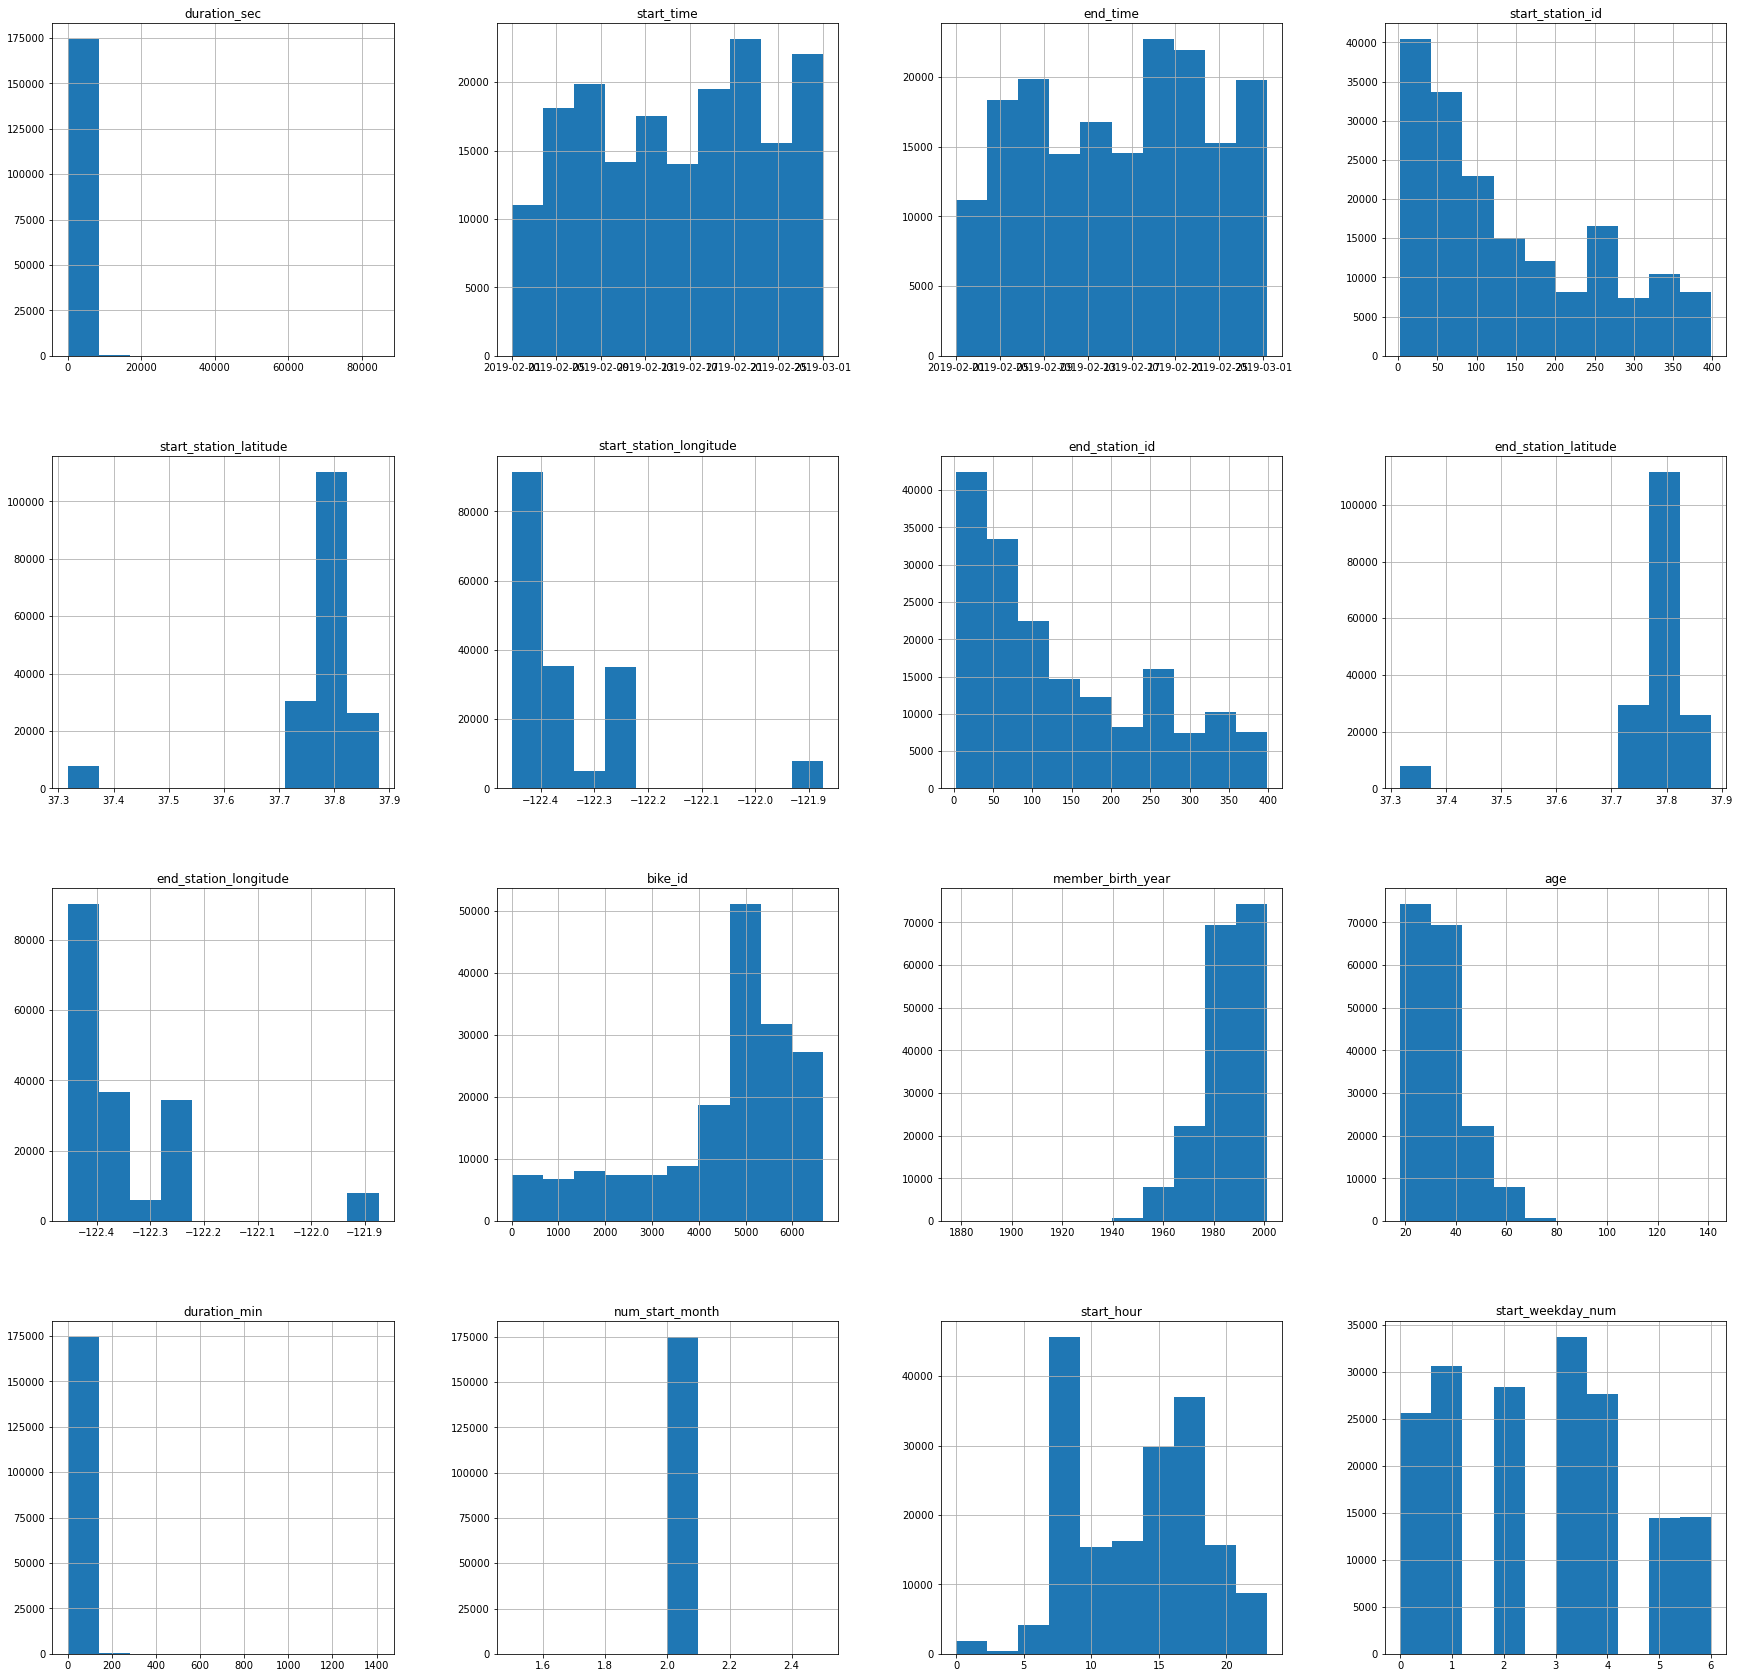

In [35]:
# getting a general overview of the cleaned data
clean_df.hist(figsize = [30,30]);

### Observations
Through the above plots, we can see that:
1. The duration histogram is highly skewed and uneven, this could mean that the time which most of the population uses the service does not vary a lot.
2. The histograms for start station id and end station id indicates that some stations serve more people compared to others
3. In the age histogram, most of the data lies between 20 years and 60 years with a few extreme values.
4. In the num start month histogram, we can see that data mostly lies in one month

### Taking a closer look at the age histogram

#### Histogram of ages distribution
- From the histogram below, we can see that a graph of the ages is positively skewed with a lot of outliers.

Text(0.5, 1.0, 'Boxplot of Distribution of Ages')

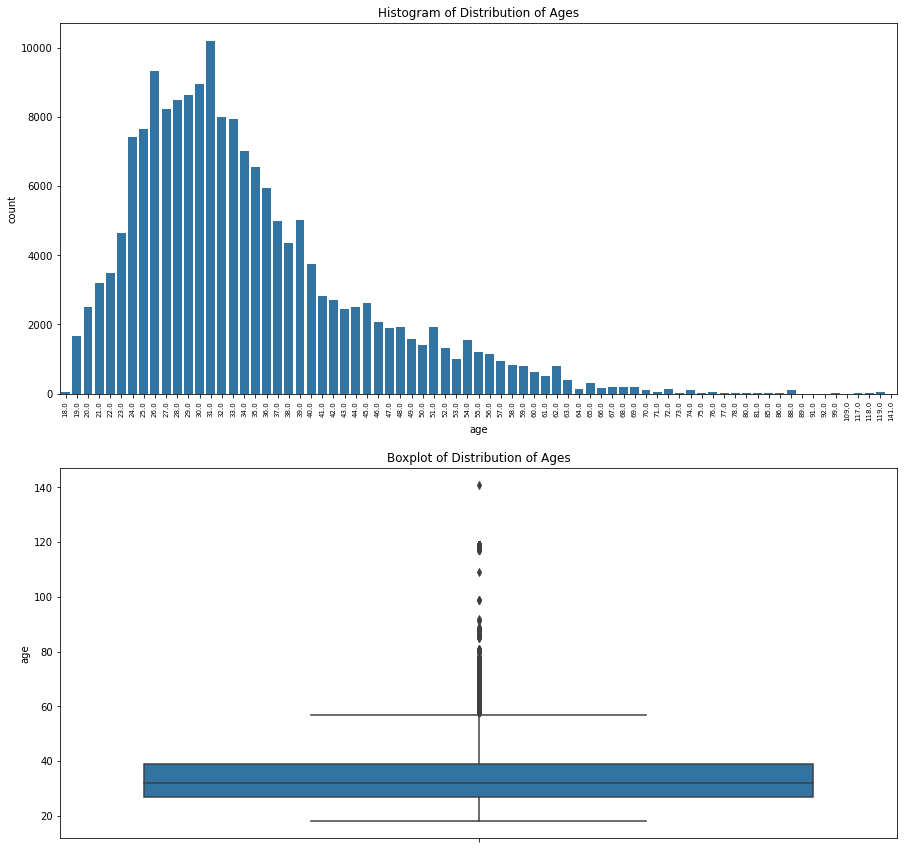

In [36]:
# plotting a histogram of ages
fig, axes = plt.subplots(2, 1,figsize=(15,15));
base_color = sb.color_palette()[0]
ax = sb.countplot(ax=axes[0],data=clean_df, x='age', color=base_color);
ax.set_title("Histogram of Distribution of Ages")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=7);
ax = sb.boxplot(ax=axes[1],data=clean_df, y='age', color=base_color)
ax.set_title("Boxplot of Distribution of Ages")

#### Using a log scale
- Since the tail of the ages distribution is very long and the data is a bit unclear, I will be using a log scale

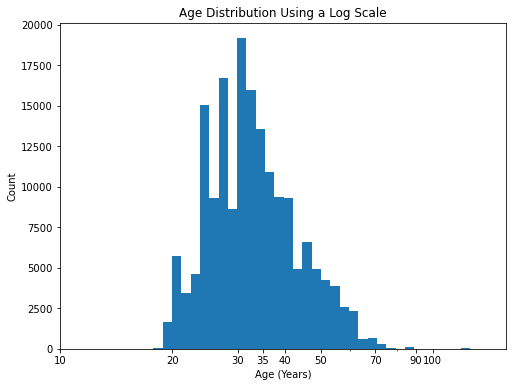

In [37]:
# Plotting histogram using log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(clean_df['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = clean_df, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.title('Age Distribution Using a Log Scale');

### Removing age outliers
- Since I am interested in the general population, outliers might affect the accuracy of the analysis hence I chose to remove them.
- An observation is considered to be an outlier if it is less than (Q1-(1.5*IQR)) or greater than (Q3+(1.5*IQR))

In [38]:
# Computing IQR for age
age_Q1 = clean_df['age'].quantile(0.25)
age_Q3 = clean_df['age'].quantile(0.75)
IQR = age_Q3 - age_Q1

# Filtering ages between Q1-1.5IQR and Q3+1.5IQR
clean_df = clean_df.query('(@age_Q1 - 1.5 * @IQR) <= age <= (@age_Q3 + 1.5 * @IQR)')

### Histogram of age without the outliers
- After plotting a histogram of ages without the outliers, we find that the data is still positively skewed but the data is clearer.

Text(0.5, 1.0, 'Boxplot of Distribution of Ages Without Outliers')

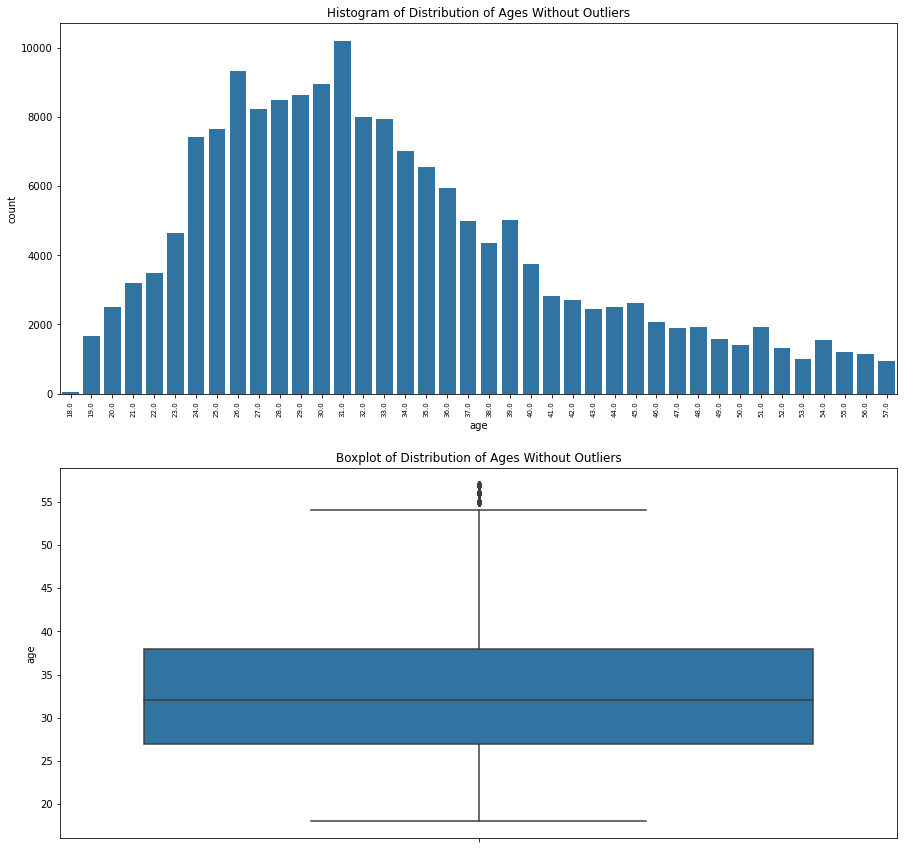

In [39]:
# plotting a histogram of ages without the outliers. 
fig, axes = plt.subplots(2, 1,figsize=(15,15));
base_color = sb.color_palette()[0]
ax = sb.countplot(ax=axes[0],data=clean_df, x='age', color=base_color);
ax.set_title("Histogram of Distribution of Ages Without Outliers")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size=7);
ax = sb.boxplot(ax=axes[1],data=clean_df, y='age', color=base_color)
ax.set_title("Boxplot of Distribution of Ages Without Outliers")
# from the graphs below, we can see that the data retains its shape and is easier to read. 

### Exploration of data with regard to duration
- After plotting a graph of the distribution of duration in seconds, we see that the graph is also positively skewed with outliers in the far right, this is not optimal in viewing the data

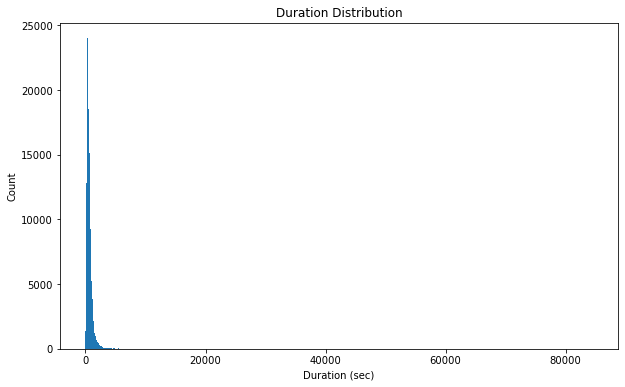

In [40]:
# plotting a duration bar chart
plt.figure(figsize=(10,6))
bins = np.arange(0, clean_df['duration_sec'].max()+50, 100)
# bins = np.arange(0, 10000, 50)
plt.hist(data=clean_df, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution');

### Using a log scale
- After plotting the graph using a log scale, the data takes a normal distribution shape with most trips lasting between 200 and 1000 seconds

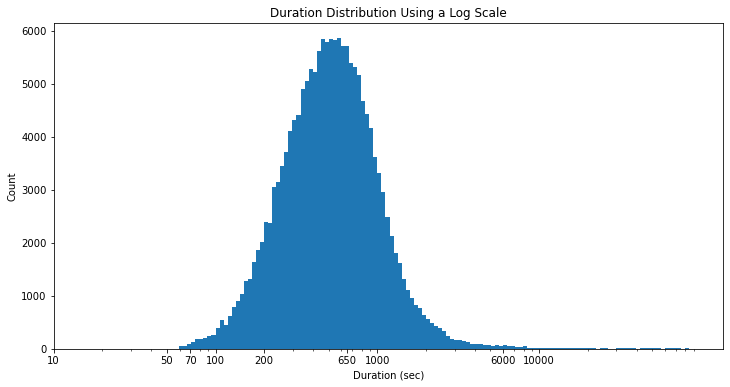

In [41]:
# calculating the bins
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(clean_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = clean_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
# matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks([10,50,70,100,200,650,1000,6000,10000], [10,50,70,100,200,650,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution Using a Log Scale' );

### Removing duration outliers
- Here, we apply the same formula for outliers as mentioned above

In [42]:
# Computing IQR for duration
duration_Q1 = clean_df['duration_sec'].quantile(0.25)
duration_Q3 = clean_df['duration_sec'].quantile(0.75)
IQR = duration_Q3 - duration_Q1

# Filtering ages between Q1-1.5IQR and Q3+1.5IQR
clean_df = clean_df.query('(@age_Q1 - 1.5 * @IQR) <= duration_sec <= (@age_Q3 + 1.5 * @IQR)')

### Histogram of duration without the outliers

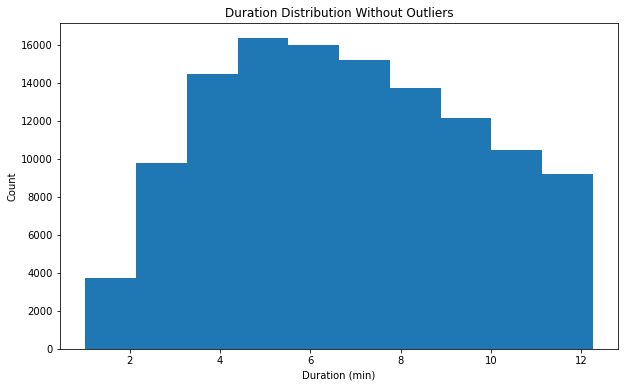

In [43]:
plt.figure(figsize=(10,6))
# bins = np.arange(0, clean_df['duration_sec'].max()+50, 100)
# bins = np.arange(0, 10000, 50)
plt.hist(data=clean_df, x='duration_min')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Duration Distribution Without Outliers');

### Question
#### What is the ratio of the population genders

### Visualization

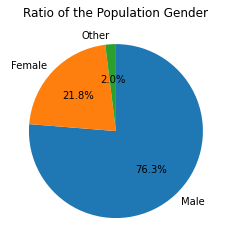

In [44]:
# pre-processing: count and sort by the number of instances of each category
sorted_counts = clean_df['member_gender'].value_counts()

# # establish the Figure
# plt.figure(figsize = [12, 5])

# # left plot: pie chart
# plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.title("Ratio of the Population Gender");
# plt.axis('square');
# we see that a majority of users are male taking 76% of the total population

### Observations
From the above plot, we can see that men make up the majority of the trips, followed by women and people who identify as a different gender.

### Question
#### How does the number of customers and subscribers compare?

### Visualization

Text(0.5, 1.0, 'Number of Customers vs Subscribers')

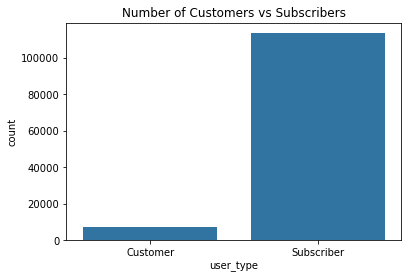

In [45]:
base_color = sb.color_palette()[0]
sb.countplot(data=clean_df, x='user_type', color=base_color);
plt.title("Number of Customers vs Subscribers")
# from this plot below we see that most users are subscribers

### Observations
From the above histogram, we can see that the number of subscribers greatly surpasses the number of customers.

### Question
#### How does the number of people enrolled for the bike share for all trip compare with the number not enrolled?

### Visualization

Text(0.5, 1.0, 'Distribution of Enrollment in the Bike Share for All Program')

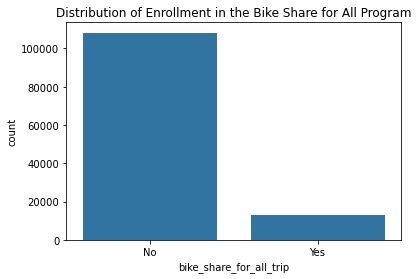

In [46]:
base_color = sb.color_palette()[0]
sb.countplot(data=clean_df, x='bike_share_for_all_trip', color=base_color);
plt.title("Distribution of Enrollment in the Bike Share for All Program")
# below we can see that most people were not enrolled in bike_share_for_all_trip program

### Observations
Most of the people are not enrolled in the bike share for all trip.

bike_share_for_all_trip tracks members who are enrolled in the Bike Share for All program for low-income residents.

### Question
#### What is the general distribution of people's trips during the day and week?

### Visualization

Text(0.5, 1.0, 'Count of The Daily Number of Trips in a Week')

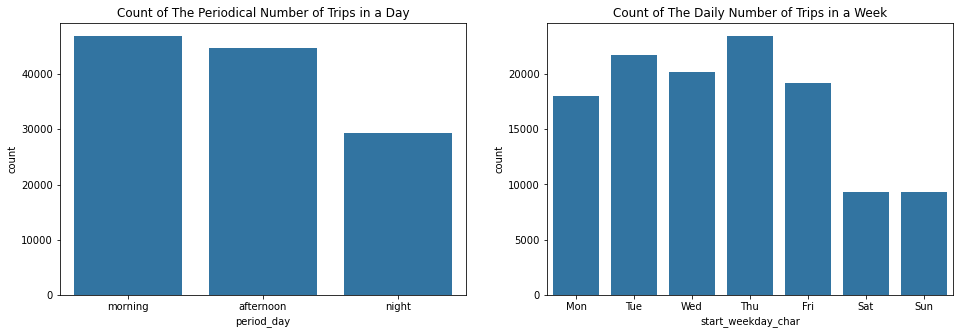

In [47]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.countplot(data=clean_df, x='period_day', color=base_color);
plt.title("Count of The Periodical Number of Trips in a Day")

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.countplot(data=clean_df, x='start_weekday_char', color=base_color);
plt.title("Count of The Daily Number of Trips in a Week")

### Observations
1. More people initialize bike trips in the morning as compared to other time periods
2. Weekdays (Monday - Friday) have more people starting trips

### Question
#### What are the patterns of overall usage of the service in weekdays and the weekends

In [48]:
weekend_data = clean_df.query('start_weekday_char in ["Sat", "Sun"] ')
print(weekend_data.start_weekday_char.value_counts())
weekday_data = clean_df.query('start_weekday_char in ["Mon", "Tue", "Wed", "Thu", "Fri"] ')
print(weekday_data.start_weekday_char.value_counts())

Sun    9278
Sat    9274
Mon       0
Tue       0
Wed       0
Thu       0
Fri       0
Name: start_weekday_char, dtype: int64
Thu    23426
Tue    21714
Wed    20192
Fri    19155
Mon    17983
Sat        0
Sun        0
Name: start_weekday_char, dtype: int64


### Visualization

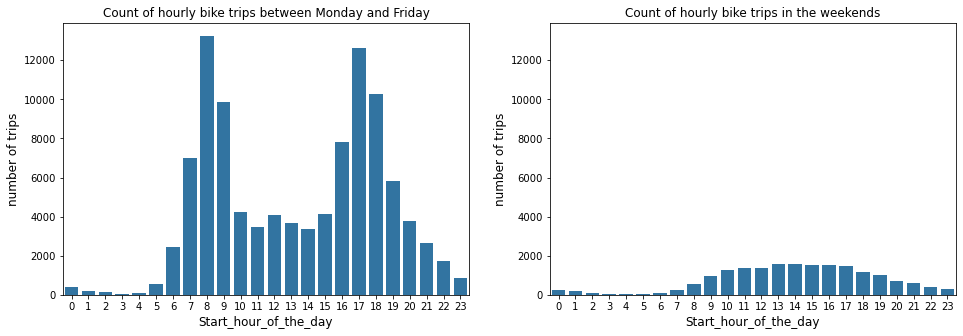

In [49]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.countplot(data=weekday_data, x='start_hour', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Count of hourly bike trips between Monday and Friday');
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.countplot(data=weekend_data, x='start_hour', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Count of hourly bike trips in the weekends');
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

### Observations
From the two plots, We can see that in the weekends most people start trips from 11 a.m and there is an increase in the number of people starting trips at around midnight as compared to the data from the weekdays.
In the weekdays, the graph shape is bimodal with most people starting trips during the rush hours. This gives an impression that most people use bikes for commuting during weekdays and for leisure activities during the weekends. However, this is just a hypothesis and there could be other reasons behind the plots. 

### Question
#### Is there a difference in trip start times within the weeks among the people in the dataset?

### Visualizations

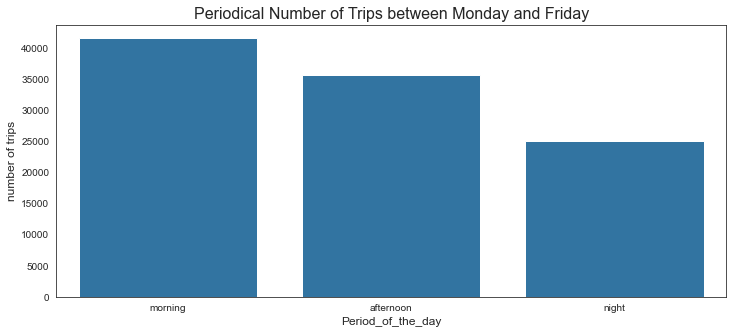

In [50]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,5))
sb.set_style("white")
sb.countplot(data=weekday_data, x='period_day', color=base_color)
plt.xlabel('Period_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Periodical Number of Trips between Monday and Friday', fontsize=16);

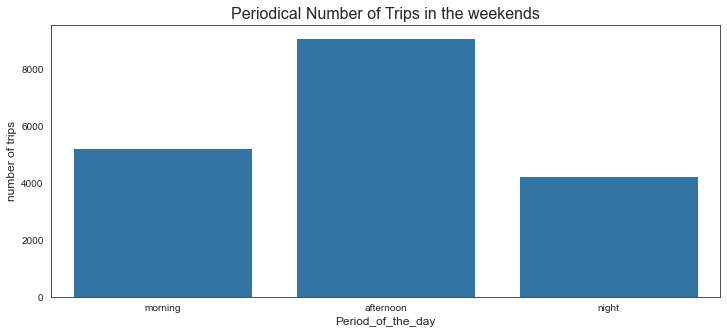

In [51]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,5))
# base_color = sb.color_palette()[1][2]
sb.set_style("white")
sb.countplot(data=weekend_data, x='period_day', color = base_color)
# sb.countplot(data=clean_df, x='start_hour', hue='user_type', color=base_color[1], palette=["C0", "C1", "k"])
plt.xlabel('Period_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Periodical Number of Trips in the weekends', fontsize=16);

### Observations
- From the two plots above, the clear segmentation of time helps supports our findings from the previous question. Here, we can clearly see that in the weekends, most people start their trips in the afternoon while in the  weekdays, most people begin their trips in the morning.
- We can also see that fewer people make trips in the weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
My variables of interest were:

    age
    duration
    gender
    user status (customer/subscriber)
    bike share for all (whether enrolled or not)
    time (morning/afternoon/night)
    
- The age variable had to be transformed and this was done by removing the outliers.
- The duration variable also had to be transformed which was also done by stripping the outliers
- The gender did not need to be transformed and we observed that there are more men than women and other genders using this service.
- I added a column categorizing the time between morning, evening and night, this helps get a general view of the daytime.
- We observed that there are more subscribers than customers
- We observed that most people were not enrolled in the bike share for all program.
- We observed that the amount of trips started decreases between morning, evening and night

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- I started my exploration with the age variable, upon closer inspection, the age histogram was positively skewed with a lot of outliers. I had to use log to depict its distribution in a better way. I then removed outliers by filtering the data between the quartile ranges. I replotted the age histogram and it was still positively skewed but easier to extract information.
- We observed from the remaining data that most people using the service are in their 20s and 30s.
- The duration data had to be cleaned due to the amount of outliers in the data, I also added an extra column called duration_min which contains the duration but in minutes for easier readability. On plotting a histogram of duration in minutes, we can now see that the longest time is 12 minutes with the graph having a positive skew
- I added a column called start_weekday_char which tracks the days of the week people initiated the service. We observed that the number of people using the service in the weekdays (Monday-Friday), is greater that the number of people using the service in the weekends
- From the plots showing the distribution of users during weekdays and weekends, we can see that most people start trips at 8 :00 am and 5:00 pm during the weekdays and between 11:00 am and 5:00 pm during the weekends.

## Bivariate Exploration

In [52]:
numeric_vars = ['duration_min', 'member_birth_year', 'start_hour', 'start_weekday_num', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'char_start_month', 'char_end_month', 'period_day', 'period_day_end', 'start_weekday_char']

### Questions
#### Does the number of trips vary between customers and subscribers? Is it affected by the days of the week? 

### Visualizations

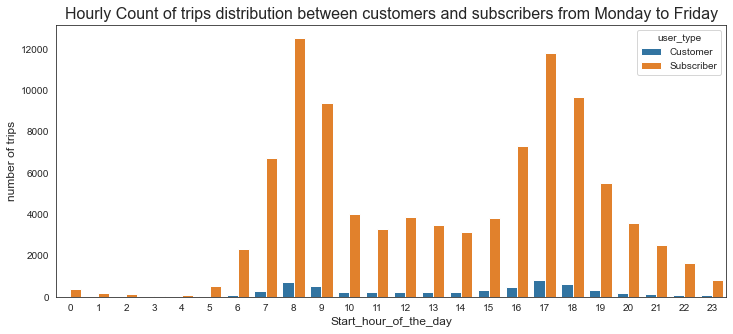

In [53]:
plt.figure(figsize=(12,5))
sb.set_style("white")
sb.countplot(data=weekday_data, x='start_hour', hue='user_type', palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('number of trips', fontsize=12)
plt.title('Hourly Count of trips distribution between customers and subscribers from Monday to Friday', fontsize=16);

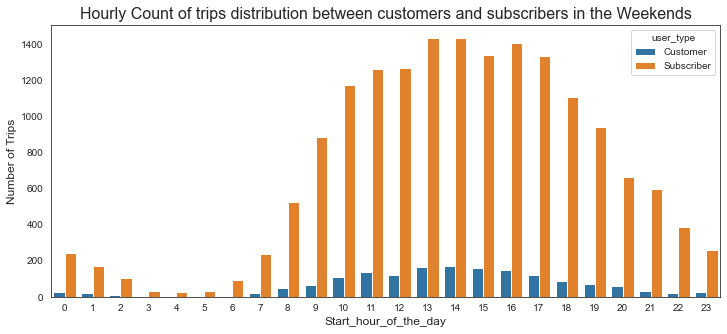

In [54]:
plt.figure(figsize=(12,5))
sb.set_style("white")
sb.countplot(data=weekend_data, x='start_hour', hue='user_type', palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Count of trips distribution between customers and subscribers in the Weekends', fontsize=16);

### Observations
- From the two plots, we can see that the curves between customers and subscribers are quite similar depcting the difference in the number of people. This implies that the trip initialization habits between customers and subscribers are similar.
- We can also see that in the weekends most people start trips from 11 a.m and there is an increase in the number of people starting rides at around midnight as compared to the data from the weekdays.
- In the weekdays, the graph shape is bimodal with most people start rides during the rush hours. This gives an impression that most people use bikes for commuting during weekdays and for leisure activities during the weekends. However, this is just a hypothesis and there could be other reasons behind the plots.

### Question
#### Is there a difference between the trips among genders during the day?

### Visualization

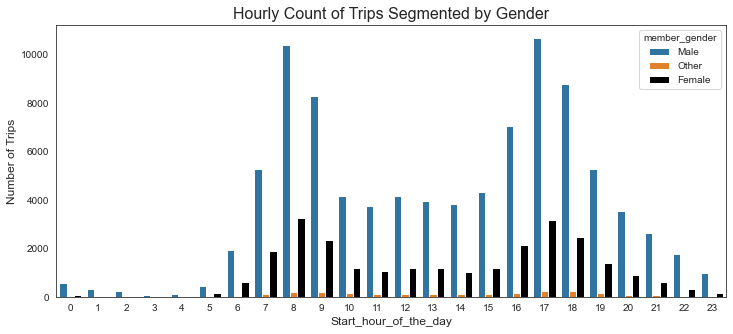

In [55]:
plt.figure(figsize=(12,5))
sb.set_style("white")
sb.countplot(data=clean_df, x='start_hour', hue='member_gender', palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Count of Trips Segmented by Gender', fontsize=16);

### Observation
Looking at the above plot we can see that the distribution of the three genders is roughly similar, this implies that bikes are ridden proportionally across all the genders

### Question
#### How does the average length of trips compare during the various periods of the day?

### Visualization

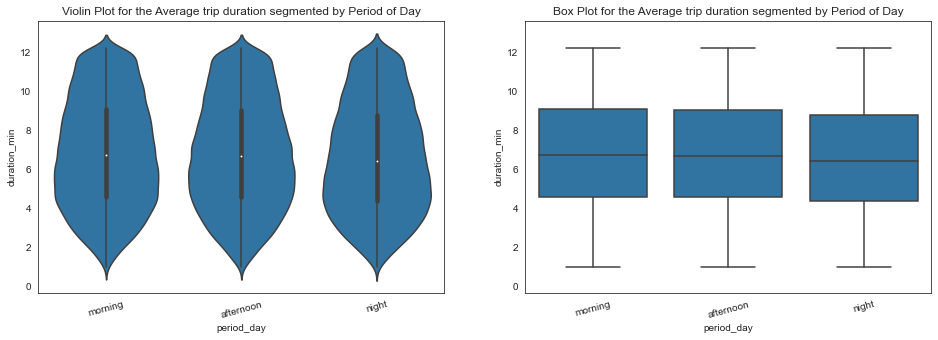

In [56]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=clean_df, x='period_day', y='duration_min', color=base_color)
plt.xticks(rotation=15);
plt.title('Violin Plot for the Average trip duration segmented by Period of Day');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=clean_df, x='period_day', y='duration_min', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.title('Box Plot for the Average trip duration segmented by Period of Day');

### Observations
The duration of trips in minutes does not vary a lot in the morning and in the afternoon, however, at night the duration reduces  compared to the aforementioned time.

### Question
#### Is there a difference between the trips of the poeple who are a part of the bike share for all trip programme?

### Visualization

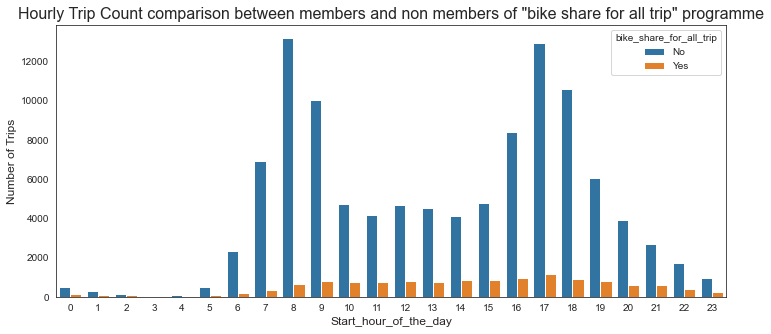

In [57]:
plt.figure(figsize=(12,5))
sb.set_style("white")
sb.countplot(data=clean_df, x='start_hour', hue='bike_share_for_all_trip', palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Trip Count comparison between members and non members of "bike share for all trip" programme', fontsize=16);

### Observation
The distribution between those who are a part of the bike share for all trip programme and those who are not is mostly similar, however, the highest number of people starting trips who are a part of the programme is at 5:00 pm 

### Question
#### How does the average trip duration vary between gender?

### Visualization

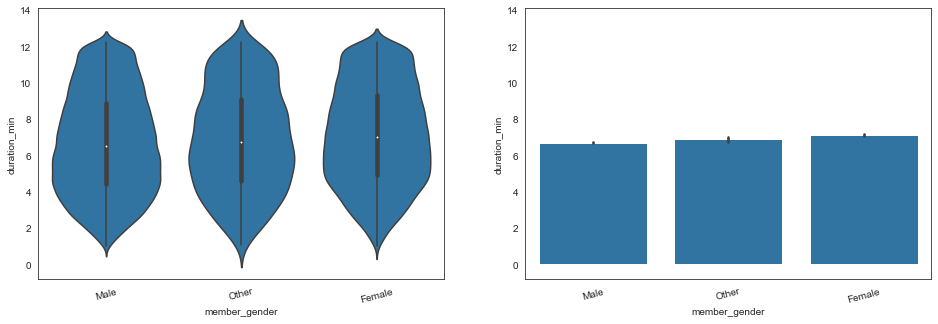

In [58]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=clean_df, x='member_gender', y='duration_min', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.barplot(data=clean_df, x='member_gender', y='duration_min', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

### Observations
- Females have a higher mean of minutes spent per trip while men have the lowest mean of minutes spent per trip.
- The violinplot tells us that even though mean is between 6 and 8 minutes, most trips are less than 6 minutes long

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We observed the relationship between customer and subscriber and their overall usage of the service between weekdays and weekends. We found that the usage between the groups is almost similar. We can also see that the distribution takes the same shape as that of the total number of people.
- We also observed that females take more time on average with bikes compared to other genders and men.
- We can also see that the amount of time varies during the day with night trips having the least average minutes of the three time periods.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From the above graphs, we can deduce that:
- the distribution of the three genders is roughly similar in terms of the daily usage of the service
- Most trips are started early in the morning and in the evening, this is applicable regardless of gender

This tells us that the bikes could be primarily used as a form of commuting to and from work, and that men regularly commute more to work than women.

## Multivariate Exploration

### Question
#### Is there any correlation between any of the numerical data values?

### Visualization

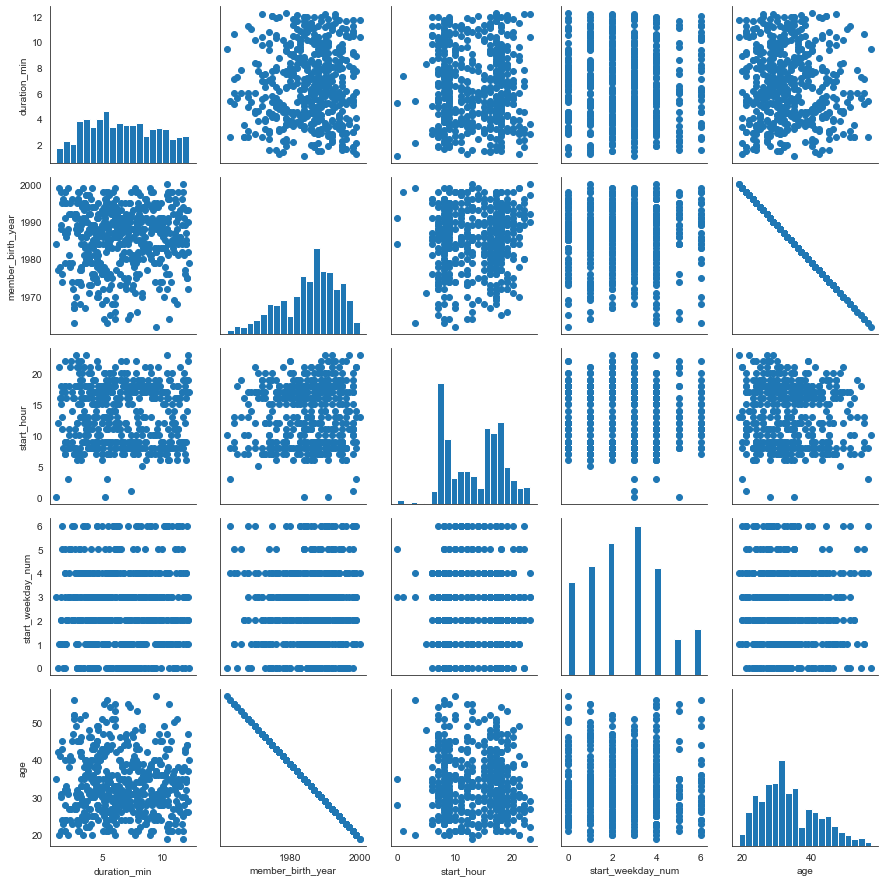

In [59]:
# taking a random sample from the data 
data_samp = clean_df.sample(n=500, replace = False)
g = sb.PairGrid(data = data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Observation
From the above plots, there does not appear to be any values with direct correlation.

### Question
#### How does the hourly usage of the service compare between customers and subscribers during the week? 

### Visualization

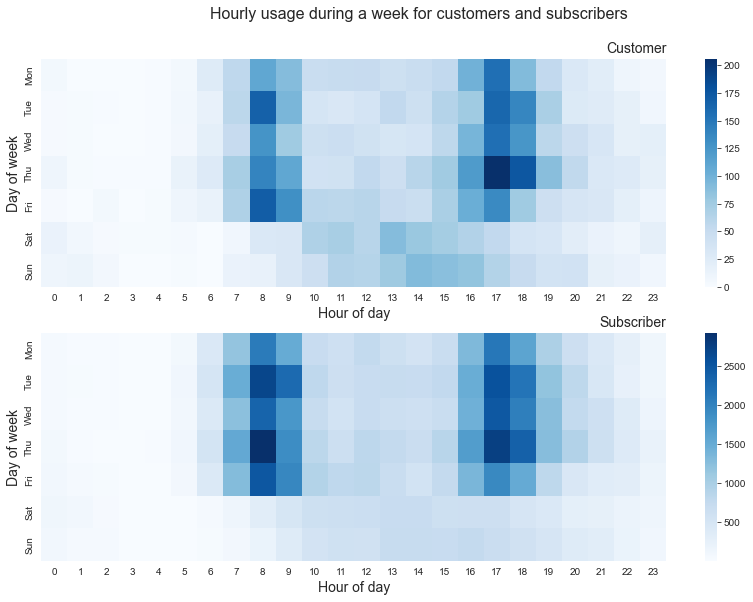

In [60]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = clean_df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday_char', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday_char', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = clean_df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday_char', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday_char', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

### Observations
1. For both customers and subscribers, Thursdays record a higher concentration of people using the service
2. There appears to be a pettern where most people use the service between 7 and 9 am and between 4.00 and 6.00pm
3. Fewer people use the service in the weekends but those that do, they tend to use the service after noon.

### Question
#### Who's trips are longer on average between customers and subscribers? 

### Visualization

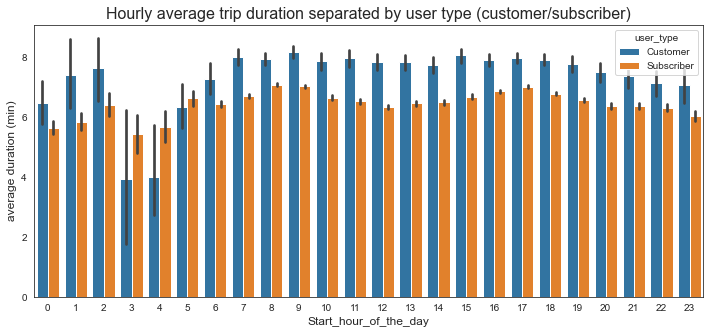

In [61]:
plt.figure(figsize=(12,5))
# base_color = sb.color_palette()[1][2]
sb.set_style("white")
sb.barplot(data=clean_df, x='start_hour', y="duration_min", hue='user_type', palette=["C0", "C1", "k"])
# sb.countplot(data=clean_df, x='start_hour', hue='user_type', color=base_color[1], palette=["C0", "C1", "k"])
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('average duration (min)', fontsize=12)
plt.title('Hourly average trip duration separated by user type (customer/subscriber)', fontsize=16);

### Observation
As we can see from the above plot, for most of the day, customers make longer trips on average during the day compared to subscribers, this is could be due to the lower number hence less variations in ride time or other reasons.

### Question
#### What is the daily distribution of usage of the service across the top 10 stations 

### Visualization

In [62]:
# let us limit to the top 10 destinations:
top_destinations = clean_df['end_station_name'].value_counts().index[:10]
# here we create dataframe with trips only to top 10 destinations
top_dest_df = clean_df.loc[clean_df['end_station_name'].isin(top_destinations)]
top_dest_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,duration_min,num_start_month,char_start_month,start_hour,period_day,start_weekday_num,start_weekday_char
111952,324,2019-02-12 16:27:02.786,2019-02-12 16:32:26.790,27.0,Beale St at Harrison St,37.788059,-122.391865,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Male,No,33.0,5.400000,2,Feb,16,afternoon,1,Tue
74681,727,2019-02-19 09:49:48.726,2019-02-19 10:01:56.716,119.0,18th St at Noe St,37.761047,-122.432642,58.0,Market St at 10th St,37.776619,...,Female,No,45.0,12.116667,2,Feb,9,morning,1,Tue
160587,371,2019-02-05 16:54:07.818,2019-02-05 17:00:19.469,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Female,No,44.0,6.183333,2,Feb,16,afternoon,1,Tue
182170,357,2019-02-01 08:33:50.485,2019-02-01 08:39:47.549,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Female,No,28.0,5.950000,2,Feb,8,morning,4,Fri
178657,454,2019-02-01 16:40:31.964,2019-02-01 16:48:06.373,50.0,2nd St at Townsend St,37.780526,-122.390288,16.0,Steuart St at Market St,37.794130,...,Male,No,31.0,7.566667,2,Feb,16,afternoon,4,Fri


### Question
#### What is the distribution of the duration of trips to the top 10 destinations in the week?

### Visualization

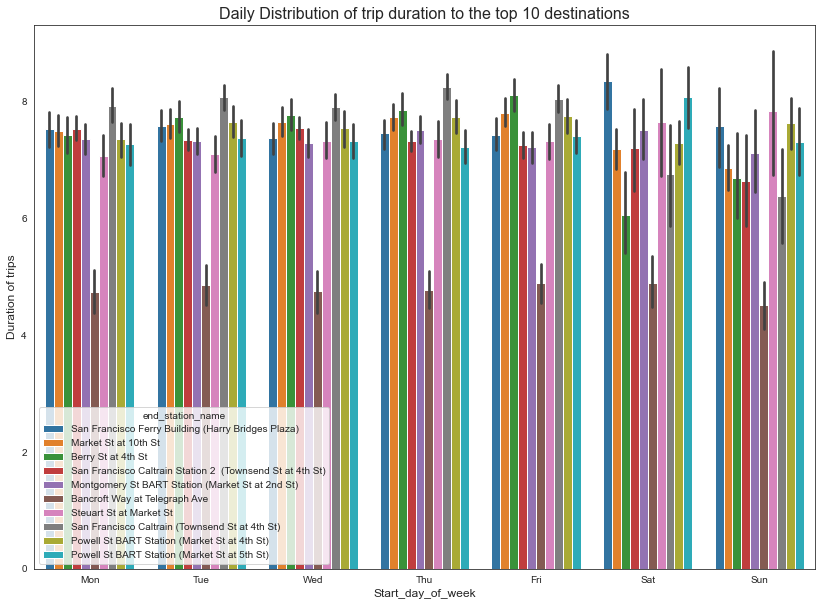

In [63]:
plt.figure(figsize=(14,10))
sb.barplot(data=top_dest_df, x='start_weekday_char', y='duration_min', hue='end_station_name')
plt.xlabel('Start_day_of_week', fontsize=12)
plt.ylabel('Duration of trips', fontsize=12)
plt.title("Daily Distribution of trip duration to the top 10 destinations", fontsize=16);

### Observations
There appears to be minimal variations in the duration of trips to each of the top 10 destinations, this could imply that most people generally make trips to and from the same places.

In [64]:
clean_df.to_csv("cleaned_data.csv", index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The hourly and daily data complement each other and help underline observed patterns such as the periods when most people are using the service do not vary by much on an hourly and day to day basis. We can also see that not many people use the service in the weekends.
We also observe that customers take more time on average per trip compared to the subscribers, this could be because of a special need or because they are simply less and less varied in the amount of time spent travelling.

### Were there any interesting or surprising interactions between features?
What I found interesting was the fact that the average trip time to the most common destinations did not vary too much in the week.

## Conclusions

From the wrangling and exploration, we have identified that there are two different behaviors of people using the service. We have seen that in weekdays, the service is mostly used early in the morning (8:00 am) and in the evening (5:00 pm). This is in contrast to the usage in the weekends where most poeple start using the service from 11:00 am, this usage does not drop, however, it follows a normal distribution curve eventually decreasing in the evening.

We can also see that there is no correlation between the ages of the people and trips. 

Most of the users are men, however, men on average have the shortest trips as compared to women and others. The utilization of the service in terms of gender also does not vary much.

We also found out the number of subscribers exceeds the number of customers by a lot. Their patterns while using the service are not very different. Whenever there is a rise in subscribers starting trips, the rise is also seen in the customers.

We also got that on average, customers trips last longer compared to subscribers